In [1]:

import tensorflow as tf
#importing mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def weights(shape2):
  var= tf.truncated_normal(shape2,stddev=0.1)
  return tf.Variable(var)
def bias(shape1):
  var=tf.constant(0.1,shape=shape1)
  return tf.Variable(var)
X=tf.placeholder(tf.float32,[None,784],name='X')
Y=tf.placeholder(tf.float32,[None,10],name='Y')
dropout=0.75
keep_prob=tf.placeholder(tf.float32)

In [0]:
def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
#ksize = kernel size
def pooling(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [0]:
#first convoluion layer
#[frame_height,frame_width,number_of_channel,number_of_filter]
w1=weights([5,5,1,16])
b1=bias([16])

#tensorflow conv2d function expects a 4d tensor with dimention corresponds to 
#batch_size, height,width,no. channel
image=tf.reshape(X,[-1,28,28,1])
#relu function is used to remove the negative pixel values from the result
#------------(not varified bias is added to reflect the some greay color-------------
conv1=tf.nn.relu(conv2d(image,w1)+b1)
#conv1 dimention ==[-1,28,28,32]
pool1=pooling(conv1)
#pool1 dimention ==[-1,14,14,32]


#second convolution layer
w2=weights([5,5,16,36])
b2=bias([36])
conv2=tf.nn.relu(conv2d(pool1,w2)+b2)
#dimentions==[-1,14,14,64]     
pool2=pooling(conv2)
#dimention==[-1,7,7,64]

# fully connected layers
#first fully connected layer with 1024 nerons


weight_fc1=weights([7*7*36,1024])
bias_fc1=bias([1024])

pool2_flat=tf.reshape(pool2,[-1,7*7*36])
fc1=tf.nn.relu(tf.matmul(pool2_flat,weight_fc1) + bias_fc1)
layer_drop=tf.nn.dropout(fc1,keep_prob)

#second fully connected layer

weight_fc2=weights([1024,10])
bias_fc2=bias([10])

fc2= tf.matmul(layer_drop,weight_fc2) + bias_fc2
#need not to use the softmax function to produce the vector of 10 units
#cost will contain that function


In [5]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=fc2))

optimize=tf.train.AdamOptimizer(1e-4).minimize(cost)

prediction=tf.equal(tf.argmax(fc2,1) , tf.argmax(Y,1))

#tf.cast convert the boolean array into the ones and zeros 

accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))

predict=tf.equal(tf.argmax(fc2,1),tf.argmax(Y,1)) 

accu=tf.reduce_mean(tf.cast(predict,tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



iteration 0 loss 2.9281278  Accuracy 0.08
iteration 100 loss 0.5693134  Accuracy 0.86
iteration 200 loss 0.27673978  Accuracy 0.92
iteration 300 loss 0.39730006  Accuracy 0.86
iteration 400 loss 0.24974968  Accuracy 0.94
iteration 500 loss 0.15904927  Accuracy 0.96
iteration 600 loss 0.16390243  Accuracy 0.96
iteration 700 loss 0.09487878  Accuracy 1.0
iteration 800 loss 0.0898698  Accuracy 0.98
iteration 900 loss 0.0850579  Accuracy 1.0
iteration 1000 loss 0.1272228  Accuracy 0.96
iteration 1100 loss 0.0760526  Accuracy 0.98
iteration 1200 loss 0.22799705  Accuracy 0.94
iteration 1300 loss 0.1127854  Accuracy 0.94
iteration 1400 loss 0.080551356  Accuracy 1.0
iteration 1500 loss 0.036612283  Accuracy 1.0
iteration 1600 loss 0.08108207  Accuracy 0.98
iteration 1700 loss 0.25317505  Accuracy 0.94
iteration 1800 loss 0.036482297  Accuracy 1.0
iteration 1900 loss 0.09716753  Accuracy 0.96
iteration 2000 loss 0.029186912  Accuracy 1.0
iteration 2100 loss 0.012919978  Accuracy 1.0
iteration

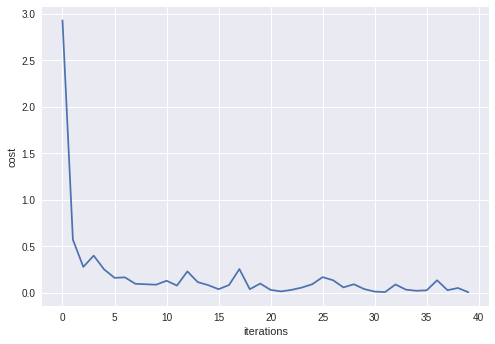

In [6]:
import matplotlib.pyplot as plt
sess=tf.Session()
sess.run(tf.global_variables_initializer())
costlist=[]
for i in range(4000):
    #batch_size==100
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(optimize,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
    if i%100==0:
      minibatch_loss,minibatch_accuracy=sess.run([cost,accuracy],feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
      print("iteration",str(i),"loss",minibatch_loss," Accuracy",minibatch_accuracy)
      costlist.append(minibatch_loss)    
num=[]
for j in range(40):
  num.append(j)
plt.plot(num,costlist)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [7]:
img1=mnist.test.images
print(sess.run(accu,feed_dict={X:img1,Y:mnist.test.labels,keep_prob:1.0}))

0.9844


In [0]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

prediction 2


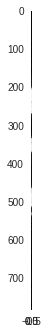

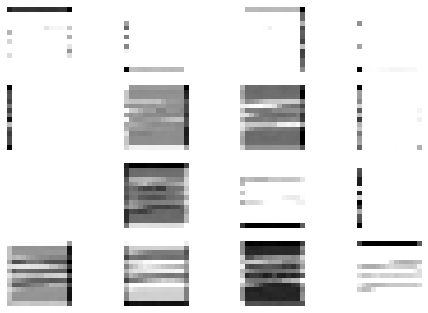

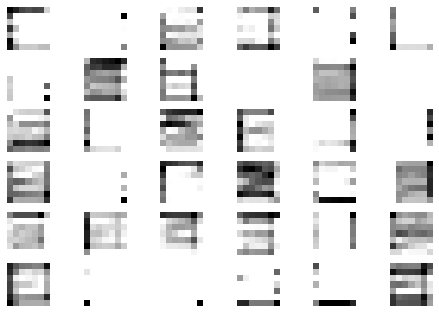

In [36]:
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage
import cv2

#img = cv2.imread('IMG_20190103_184147.jpg')

img=  cv2.imread('IMG_20190103_184147.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
my_imag = cv2.resize(gray_image, dsize=(1,784), interpolation=cv2.INTER_CUBIC)
#img = Image.open('IMG_20190103_184147.jpg').convert('LA')

#img = np.invert(Image.open("imgonline-com-ua-resize-cHTDTQ64tC.jpg").convert('L')).ravel()
#my_image = "IMG_20190101_171859.jpeg"
#img=mnist.test.images[10]
#fname = my_image
#image = np.array(ndimage.imread('IMG_20190103_184147.jpg', flatten=False))
#my_ima = scipy.misc.imresize(image, size=(1,784))
my_image=np.reshape(my_imag, (784))
#print(my_im.shape)
#my_image = my_image.reshape(1,784)
plt.imshow(my_imag)
#image1 = np.array(ndimage.imread(image, flatten=False))
#my_image = scipy.misc.imresize(image, size=(28,28)).reshape((1, 64 * 64 * 3)).T
#my_image_prediction = predict(my_image, parameters)
#plt.imshow(image1)
#plt.show(img)
prediction1 = sess.run(tf.argmax(fc2,1), feed_dict={X:[my_image],keep_prob:1.0})
print("prediction",np.squeeze(prediction1))
plot_conv_layer(layer=pool1, image=my_image)
plot_conv_layer(layer=pool2, image=my_image)

In [0]:
import math
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {X: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = sess.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()